1. What are the definitions of precision and recall? Explain why there is a tradeoff between the two? You can use graphs or any other tools to answer this question.

Precision: Ratio of correctly predicted positive observations to the total. TP / (TP + FP). Measures how many of the items predicted as positive are actually positive. Focuses on minimizing false positives.
Recall: Ratio of correctly predicted positive observations to all actual positives. TP / (TP + FN). Measures how many of the actual positives were predicted as positive. Focuses on minimizing false negatives.
Tradeoff: Exists because improving one typically comes at the expense of the other. If we increase the classification threshold, we increase precision but decrease recall. If we decrease the threshold, we increase recall but decrease precision.
          This is because the model becomes more conservative with higher thresholds, leading to fewer false positives but more false negatives. Lower thresholds lead to more false positives but fewer false negatives.

In [66]:
import pandas as pd
from pandas import set_option
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from numpy import set_printoptions, log, argmax
import seaborn as sns
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split


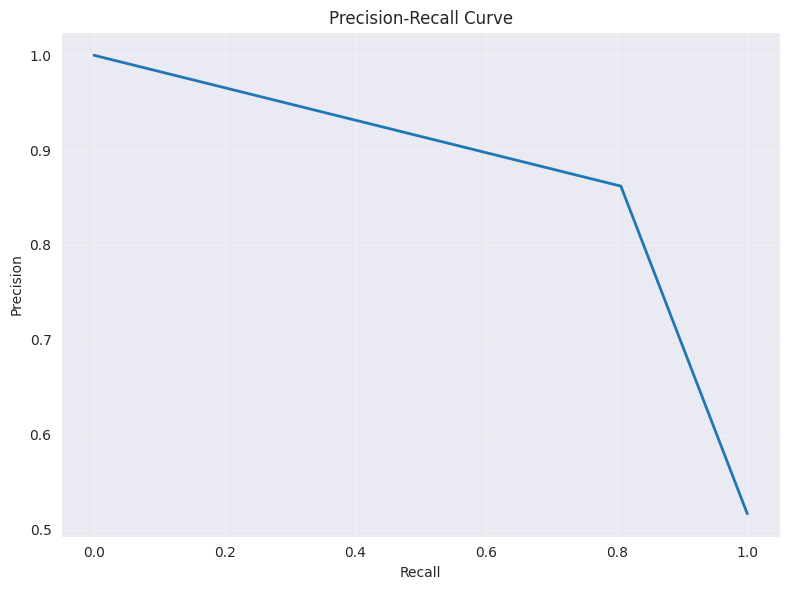

In [67]:
# Sources: https://stackoverflow.com/questions/60865028/sklearn-precision-recall-curve-and-threshold
#          https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
#          https://www.geeksforgeeks.org/precision-recall-curve-ml/
# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                          random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Create the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

2. What is the definition of F1 score and how do you interpret a high F1 score?
F1 is a performance metric for classification models that models precision and recall into a single value by the harmonic mean. F1 = 2 * (precision * recall) / (precision + recall). It balances the tradeoff between precision and recall, providing a single score that summarizes the model's performance.
A high F1 score (closer to 1) indicates that the model has high precision and recall, meaning that it correctly identifies most of the positive samples while minimizing false positives.

In [68]:
filename = 'Baseball_salary.csv'
data = read_csv(filename)
set_printoptions(precision=3)
data.head(5)
print(data.isnull().sum())

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64


In [69]:
# Clean the data by dropping rows with null salary
data = data.dropna(subset=['Salary'])
print(data.isnull().sum())

Unnamed: 0    0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary        0
NewLeague     0
dtype: int64


In [70]:
label_encoder = LabelEncoder()
data['League'] = label_encoder.fit_transform(data['League'])
print(data['League'].value_counts())
data['Division'] = label_encoder.fit_transform(data['Division'])
print(data['Division'].value_counts())
data['NewLeague'] = label_encoder.fit_transform(data['NewLeague'])
print(data['NewLeague'].value_counts())

data['Log_Salary'] = log(data['Salary'])
array = data.values
Y1 = data['Log_Salary']
X1 = data.drop(columns=['Salary', 'Log_Salary', 'Unnamed: 0'], axis=1)
X1names = X1.columns
X1.head(5)

League
0    139
1    124
Name: count, dtype: int64
Division
1    134
0    129
Name: count, dtype: int64
NewLeague
0    141
1    122
Name: count, dtype: int64


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0


In [71]:
# Standardize
data_stand = X1.copy()
stand_scaler = StandardScaler().fit(data_stand)
data_stand = stand_scaler.transform(data_stand)
# add output to standardized data
data_stand = pd.DataFrame(data_stand, columns=X1names, index=X1.index)
X1_stand = data_stand.copy()
data_objects = ((data_stand, 'data_stand'), (data, "data_raw"))

In [ ]:
set_option('display.width', 150)
set_option('display.precision', 1)
print('Standardized Data')
print(data_stand.describe())

In [ ]:
data_stand_with_salary = data_stand.copy()
data_stand_with_salary['Log_Salary'] = Y1
data_stand_with_salary.hist()
plt.suptitle(f"Histograms of Standardized Data")
plt.tight_layout()
plt.show()

3. Use the baseball salary dataset and the exploratory data analysis to determine visually
which are the candidate features for the model. Use the log(salary) as your output and
pick six features as input for your data (use the exploratory analysis as a basis for the
choice of input features).

In [ ]:
plt.figure() # new plot
#plt.tight_layout()
corMat = data_stand_with_salary.corr(method='pearson')
print(corMat)
## plot correlation matrix as a heat map
sns.heatmap(corMat, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title(f"STANDARDIZED DATA CORRELATION MATRIX USING HEAT MAP")
plt.show()

## scatter plot of all data
plt.figure()
# # The output overlaps itself, resize it to display better (w padding)
scatter_matrix(data_stand_with_salary)
plt.tight_layout(pad=0.1)
plt.show()

Features with high correlation to Log_Salary: CHits, CRuns, CAtBat, CRBI, CWalks, Years

4. Develop a regression decision tree model for the dataset base on default setting of the
regressor, (i.e. use DecisionTreeRegressor() without any input. Check out the
documentation for DecisionTreeRegressor() in Scikit learn library). You can save the
image of the decision tree by right clicking on the console and save image/copy image
and paste it into a paint or any other graphic package and save it as a .png file so you
can look at it.


In [ ]:
selected_feature_names = ['CHits', 'CRuns', 'CAtBat', 'CRBI', 'CWalks', 'Years']
X1_selected = data_stand[selected_feature_names]
X_train, X_test, y_train, y_test = train_test_split(X1_selected, Y1, test_size=0.3)
default_model = DecisionTreeRegressor()
default_model.fit(X_train, y_train)
feature_names = X1_selected.columns if hasattr(X1_selected, 'columns') else None
plt.figure(figsize=(12, 8))
plot_tree(default_model, filled=True,
          feature_names=selected_feature_names,
          precision=2, proportion=True)
plt.title(f"Default Model Decision Tree: Depth {default_model.get_depth()}")
plt.tight_layout()
plt.show()

5. How many levels does the default decision tree have based on the six features (tree depth)?
The tree with 6 features has 14 levels, indicating an overfit model. The tree is too large to display in full here, but the image can be saved as a .png file for further examination.

6. Run the system again with a depth of 2 and compare the performance measures in the
two cases. Explain the difference in the context of performance measure as it relates to
variance/bias trade off.